# Analysis of Moran process data.

Copy latest version of the data with:

```
scp siren:Memory-size-in-the-prisoners-dilemma/moran_data/moran/data.csv .
```

**TODO There is an error in the headers of the data:

`Best_response_p1	Best_response_p2	Best_response_p3	Best_response_p4` should be swapped with	`A_11	A_12	A_21	A_22`

This has been changed manually in the data.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

import opt_mo

In [52]:
df = pd.read_csv("data.csv")

def get_SEE_from_pandas_row(row):
    """
    A vectorized SSE calculation.
    """
    vector = row[
        [
            "Best_response_p1", 
            "Best_response_p2", 
            "Best_response_p3", 
            "Best_response_p4",
        ]
    ]
    return opt_mo.tools.get_least_squares(vector)

df["SSE"] = df.apply(get_SEE_from_pandas_row, axis=1)
df["ratio"] = df["x_K"] / df["non_dynamic_x_K"]

In [53]:
df.describe()

,seed,Opponent_p1,Opponent_p2,Opponent_p3,Opponent_p4,K,A_11,A_12,A_21,A_22,Best_response_p1,Best_response_p2,Best_response_p3,Best_response_p4,x_K,non_dynamic_x_K,SSE,ratio
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,291.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,285.000000,291.000000,294.000000,285.000000
mean,47.653061,0.465825,0.511869,0.544292,0.469731,2.000000,1.308780,3.085103,0.795554,2.161209,0.214679,0.222522,0.097556,0.157843,0.739899,0.737000,0.249980,1.002823
std,28.113411,0.288731,0.281686,0.275430,0.295292,0.817889,0.663055,0.868170,0.797543,0.390933,0.353476,0.235987,0.291665,0.337261,0.210283,0.210132,0.331998,0.040941
min,0.000000,0.010374,0.019475,0.000114,0.008047,1.000000,1.000000,1.174336,0.040723,1.185888,0.000000,0.000000,0.000000,0.000000,0.220683,0.217079,0.000318,0.745088
25%,23.000000,0.218645,0.284906,0.287125,0.193714,1.000000,1.000000,2.483394,0.325100,1.986846,0.000000,0.000000,0.000000,0.000000,0.578243,0.572789,0.058824,1.000000
50%,47.500000,0.430858,0.526875,0.550182,0.442591,2.000000,1.000000,3.051775,0.512379,2.205560,0.000000,0.202761,0.000000,0.000000,0.802104,0.793842,0.125308,1.000000
75%,72.000000,0.719386,0.761250,0.798696,0.724934,3.000000,1.000000,3.699599,0.834284,2.425159,0.280636,0.280755,0.000000,0.000000,0.931169,0.924426,0.233178,1.000000
max,96.000000,0.989012,0.974483,0.999867,0.986870,3.000000,4.000000,4.837108,3.223497,2.942586,1.000000,1.000000,1.000000,1.000000,0.999040,0.999040,1.529412,1.259010


Remove duplicates (the data collection scrip did not increment the seed when starting a new run: so in fact duplicates the last seed).

In [55]:
df = df.drop_duplicates()
df.describe()

,seed,Opponent_p1,Opponent_p2,Opponent_p3,Opponent_p4,K,A_11,A_12,A_21,A_22,Best_response_p1,Best_response_p2,Best_response_p3,Best_response_p4,x_K,non_dynamic_x_K,SSE,ratio
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,288.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,282.000000,288.000000,291.000000,282.000000
mean,48.000000,0.465329,0.509175,0.540930,0.474490,2.000000,1.304212,3.084909,0.793262,2.171189,0.216892,0.224816,0.098562,0.153262,0.738992,0.736090,0.247271,1.002865
std,28.048234,0.290179,0.281877,0.274835,0.293039,0.817903,0.664658,0.872073,0.801335,0.380283,0.354621,0.236111,0.293000,0.334535,0.210811,0.210709,0.330178,0.041126
min,0.000000,0.010374,0.019475,0.000114,0.008047,1.000000,1.000000,1.174336,0.040723,1.185888,0.000000,0.000000,0.000000,0.000000,0.220683,0.217079,0.000318,0.745088
25%,24.000000,0.218645,0.284906,0.287125,0.196390,1.000000,1.000000,2.470468,0.325100,1.998157,0.000000,0.000000,0.000000,0.000000,0.576272,0.569320,0.058824,1.000000
50%,48.000000,0.425721,0.523163,0.549662,0.449859,2.000000,1.000000,3.038418,0.501174,2.225109,0.000000,0.202954,0.000000,0.000000,0.801965,0.785990,0.125248,1.000000
75%,72.000000,0.719386,0.740050,0.788535,0.724934,3.000000,1.000000,3.699599,0.789599,2.425159,0.290461,0.281840,0.000000,0.000000,0.929547,0.924298,0.230925,1.000000
max,96.000000,0.989012,0.974483,0.999867,0.986870,3.000000,4.000000,4.837108,3.223497,2.942586,1.000000,1.000000,1.000000,1.000000,0.999040,0.999040,1.529412,1.259010


Remove missing values (this occurs in some calculations of the utility).

In [56]:
df = df.dropna()
df.describe()

,seed,Opponent_p1,Opponent_p2,Opponent_p3,Opponent_p4,K,A_11,A_12,A_21,A_22,Best_response_p1,Best_response_p2,Best_response_p3,Best_response_p4,x_K,non_dynamic_x_K,SSE,ratio
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,48.553191,0.451930,0.510111,0.542139,0.479700,2.000000,1.300046,3.093541,0.786207,2.162492,0.213983,0.226345,0.091069,0.154159,0.738992,0.737771,0.245850,1.002865
std,28.170029,0.284580,0.283581,0.270365,0.295986,0.817948,0.663092,0.880068,0.806997,0.376083,0.353047,0.236360,0.282240,0.336849,0.210811,0.211009,0.328973,0.041126
min,0.000000,0.010374,0.019475,0.000114,0.008047,1.000000,1.000000,1.174336,0.040723,1.185888,0.000000,0.000000,0.000000,0.000000,0.220683,0.217079,0.000318,0.745088
25%,25.000000,0.214687,0.284906,0.287125,0.193714,1.000000,1.000000,2.483394,0.316795,1.998157,0.000000,0.000000,0.000000,0.000000,0.576272,0.571377,0.058824,1.000000
50%,48.500000,0.418602,0.521277,0.550182,0.489210,2.000000,1.000000,3.065132,0.500508,2.205560,0.000000,0.203260,0.000000,0.000000,0.801965,0.795653,0.125260,1.000000
75%,73.000000,0.656264,0.761250,0.788535,0.748804,3.000000,1.000000,3.732822,0.786417,2.423570,0.280636,0.282239,0.000000,0.000000,0.929547,0.929547,0.225424,1.000000
max,96.000000,0.989012,0.974483,0.985491,0.986870,3.000000,4.000000,4.837108,3.223497,2.941925,1.000000,1.000000,1.000000,1.000000,0.999040,0.999040,1.529412,1.259010


In [127]:
def plot_figure(df):
    """
    Plot the figure for a given dataframe of data.
    
    This plots a 1 by 3 figure:
    
    First row:
        - first figure: Violon plot of x_K (4 violons: 1 for each value of K and 1 overall)
        - second figure: Violon plot of SSE (4 violons: 1 for each value of K and 1 overall)
        - third figure: Violon plot of the x_K / non_dynamic_x_K (4 "violons" 1 for each p*_i)
    """

    K_range = sorted(df["K"].unique())
    x_ticks = range(1, 5)
    x_tick_labels = ["1", "2", "3", "All"]
    fig, axarray = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    
    for ax, variable in zip(axarray, ["x_K", "SSE", "ratio"]):
        data = [
            list(df[df["K"] == K][variable]) for K in K_range
        ] + [list(df[variable])]
        ax.violinplot(data, showmeans=True, showextrema=True, showmedians=True)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels)
        if variable == "x_K":
            variable = "$x_K$"
        ax.set_title(variable)
        ax.set_xlabel("$K$")
    
    return fig

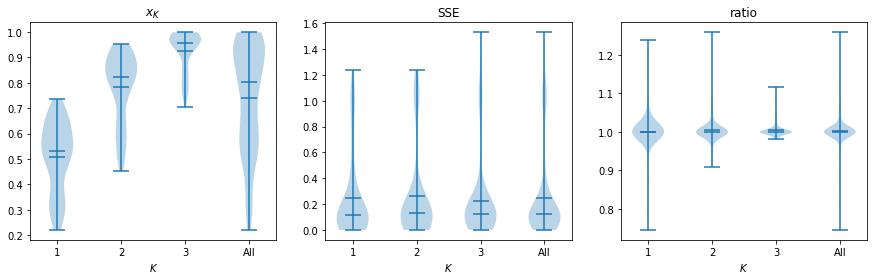

In [128]:
plot_figure(df=df);

In [137]:
df.describe()[["x_K", "SSE", "ratio"]].transpose()

,count,mean,std,min,25%,50%,75%,max
x_K,282.0,0.738992,0.210811,0.220683,0.576272,0.801965,0.929547,0.999040
SSE,282.0,0.245850,0.328973,0.000318,0.058824,0.125260,0.225424,1.529412
ratio,282.0,1.002865,0.041126,0.745088,1.000000,1.000000,1.000000,1.259010


In some instances the dynamic best response algorithm finds a better strategy however against a given opponent this results in the same game.

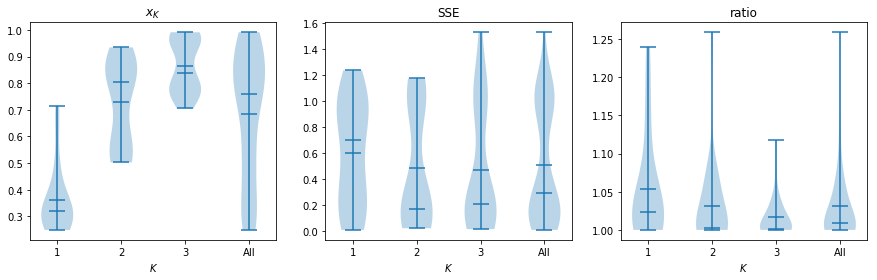

In [129]:
df_with_improved_performance = df[df["x_K"] > df["non_dynamic_x_K"]]
plot_figure(df=df_with_improved_performance);

In [136]:
df_with_improved_performance.describe()[["x_K", "SSE", "ratio"]].transpose()

,count,mean,std,min,25%,50%,75%,max
x_K,72.0,0.684473,0.241607,0.248858,0.508072,0.760094,0.871149,0.991714
SSE,72.0,0.506956,0.443817,0.008873,0.124729,0.291778,1.009489,1.529412
ratio,72.0,1.031718,0.052894,1.000000,1.000000,1.009694,1.041770,1.259010
